# **Perceptron Implementation using scikitlearn**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-deep-learning/refs/heads/main/day3/placement.csv")

In [70]:
data

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

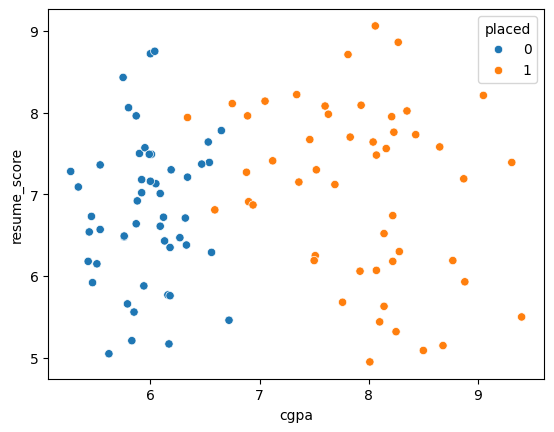

In [71]:
sns.scatterplot(x=data['cgpa'],y=data['resume_score'],hue= data['placed'])

### **Dependent and independent splits**

In [72]:
X = data.iloc[:,:2]
y = data.iloc[:,-1]

In [73]:
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [74]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [75]:
from sklearn.linear_model import Perceptron
Perceptron_model = Perceptron()

In [76]:
Perceptron_model.fit(X,y)

Perceptron()

In [77]:
Perceptron_model.coef_

array([[ 40.26, -36.  ]])

- value of weights

In [78]:
Perceptron_model.intercept_

array([-25.])

In [79]:
from mlxtend.plotting import plot_decision_regions

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

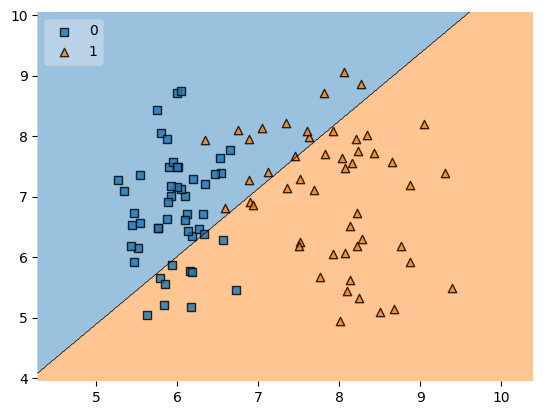

In [80]:
plot_decision_regions(X.values,y.values,clf= Perceptron_model,legend= 2)

# **Perceptron implementation from scratch**

In [81]:
from sklearn.datasets import make_classification

In [82]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

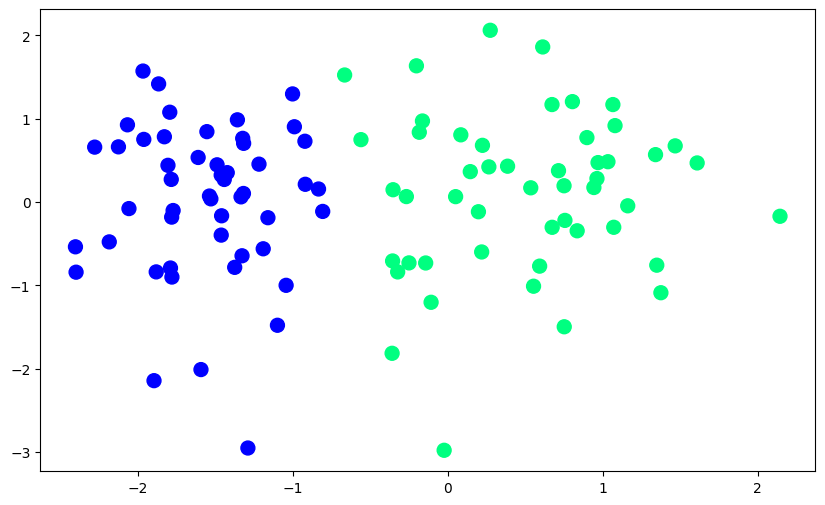

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [84]:
#function to clasify the point
def step(z):
    return 1 if z>0 else 0

In [85]:
def perceptron(X,y):
    #will intsert a element in each array of points i.e 1
    X = np.insert(X,0,1,axis=1)
    
    #initialize the weights with 1
    weights = np.ones(X.shape[1])
    
    #learning rate
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [86]:
intercept_,coef_ = perceptron(X,y)

In [87]:
intercept_

np.float64(1.0)

In [88]:
coef_

array([1.35316026, 0.05037748])

In [89]:
#variables to plot the point
slope = -(coef_[0]/coef_[1])
intercept_c = -(intercept_/coef_[1])

In [90]:
x_input = np.linspace(-3,3,100)
y_input = slope*x_input + intercept_c

(-3.0, 2.0)

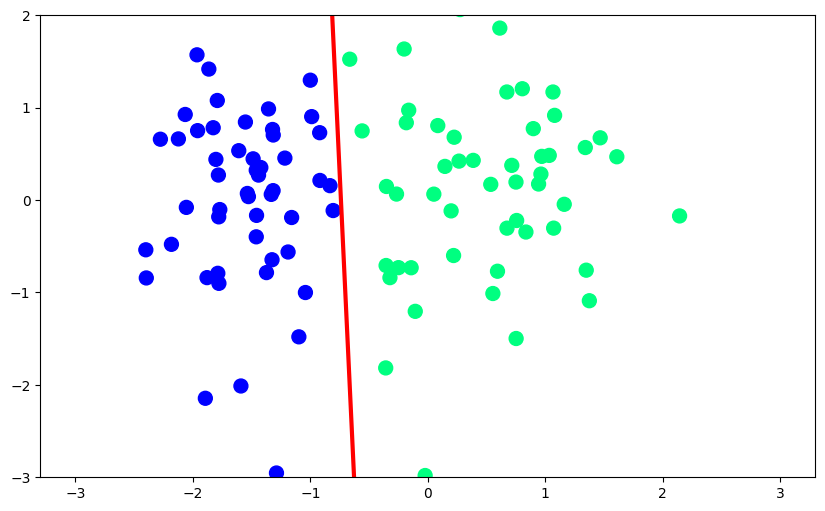

In [91]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

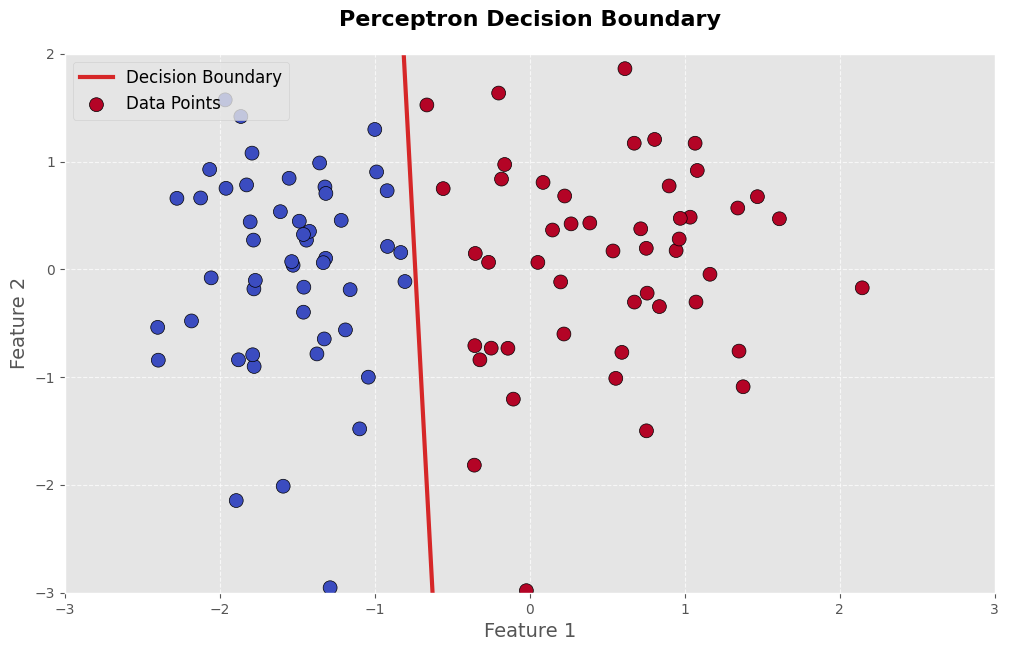

In [94]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x_input, y_input, color='#d62728', linewidth=3, label='Decision Boundary')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100, edgecolor='k', label='Data Points')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 2)
ax.set_title('Perceptron Decision Boundary', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left', fontsize=12)
plt.show()

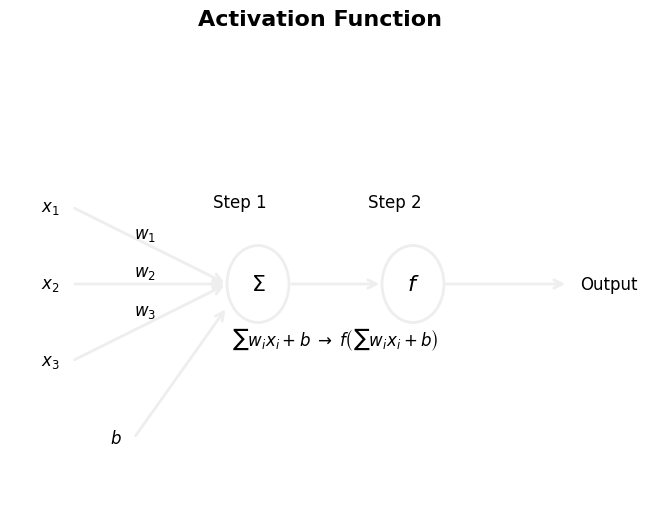

In [98]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')

sum_x, sum_y = 4, 3
act_x, act_y = 6.5, 3

sum_circle = Circle((sum_x, sum_y), 0.5, fill=False, linewidth=2)
act_circle = Circle((act_x, act_y), 0.5, fill=False, linewidth=2)
ax.add_patch(sum_circle)
ax.add_patch(act_circle)

ax.text(sum_x, sum_y, r'$\Sigma$', fontsize=16, ha='center', va='center')
ax.text(act_x, act_y, r'$f$', fontsize=16, ha='center', va='center')

input_coords = [(1, 4), (1, 3), (1, 2)]
for i, (ix, iy) in enumerate(input_coords, start=1):
    arrow = FancyArrowPatch(
        posA=(ix, iy), posB=(sum_x - 0.5, sum_y),
        arrowstyle='->', mutation_scale=15, linewidth=2
    )
    ax.add_patch(arrow)
    ax.text(ix - 0.2, iy, rf'$x_{i}$', fontsize=12, va='center', ha='right')
    ax.text((ix + sum_x)/2 - 0.5, (iy + sum_y)/2 + 0.1, rf'$w_{i}$', fontsize=12)

bias_arrow = FancyArrowPatch(
    posA=(2, 1), posB=(sum_x - 0.5, sum_y - 0.3),
    arrowstyle='->', mutation_scale=15, linewidth=2
)
ax.add_patch(bias_arrow)
ax.text(1.8, 1, r'$b$', fontsize=12, ha='right', va='center')

sum_to_act = FancyArrowPatch(
    posA=(sum_x + 0.5, sum_y), posB=(act_x - 0.5, act_y),
    arrowstyle='->', mutation_scale=15, linewidth=2
)
ax.add_patch(sum_to_act)

act_to_output = FancyArrowPatch(
    posA=(act_x + 0.5, act_y), posB=(9, 3),
    arrowstyle='->', mutation_scale=15, linewidth=2
)
ax.add_patch(act_to_output)

ax.text(sum_x - 0.3, sum_y + 1, 'Step 1', fontsize=12, ha='center')
ax.text(act_x - 0.3, act_y + 1, 'Step 2', fontsize=12, ha='center')

ax.text(
    (sum_x + act_x)/2, sum_y - 0.8,
    r'$\sum w_i x_i + b \;\rightarrow\; f\left(\sum w_i x_i + b\right)$',
    fontsize=12, ha='center'
)

ax.text(9.2, 3, 'Output', fontsize=12, va='center', ha='left')

# Add a title
ax.set_title('Activation Function', fontsize=16, fontweight='bold', pad=20)

plt.show()

## **Gradient Desecnt**

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

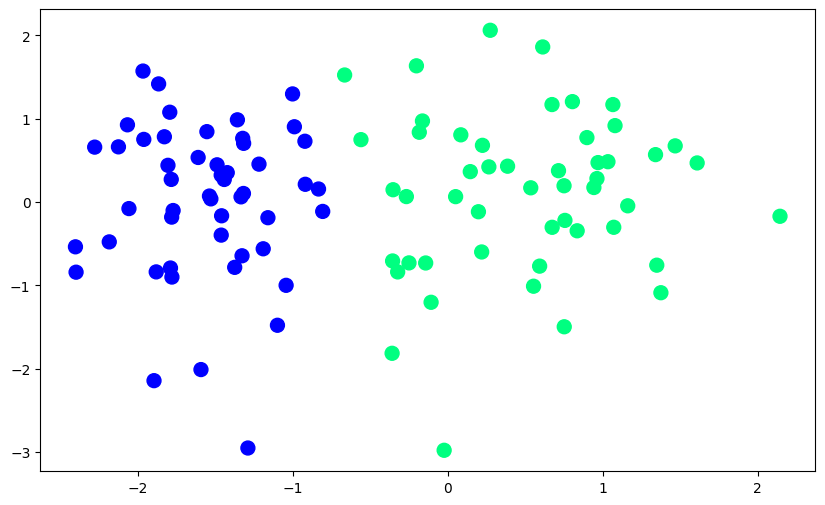

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron_gd(X,y):
    w1=w2=b=1
    lr = 0.1
    
    for n in range(1000):
        for i in range(X.shape[0]):
            
            z = w1*X[i][0] + w2*X[i][1] + b
            
            if z*y[i] < 0 :
                w1 += lr*y[i]*X[i][0]
                w2 += lr*y[i]*X[i][1]
                b += lr*y[i]
                
                
    return w1,w2,b
                

In [ ]:
w1 , w2 , b = perceptron_gd(X,y)

In [ ]:
m = -(w1/w2)
c = -(b/w2)

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

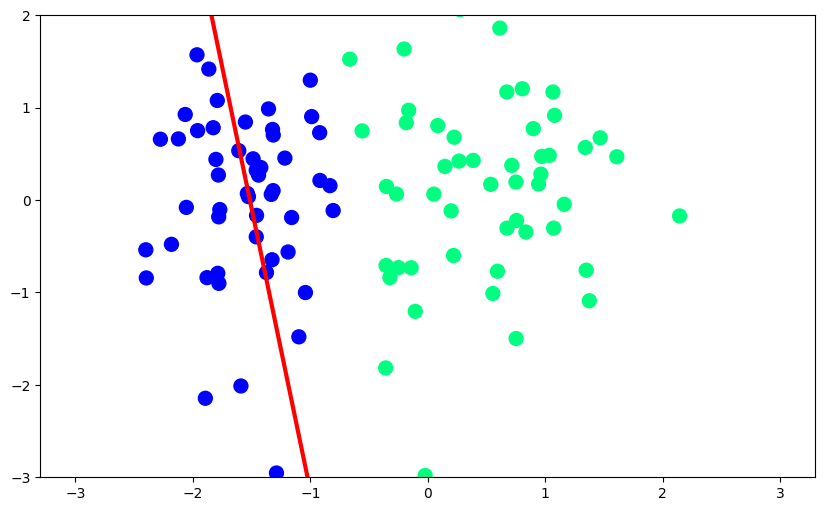

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)